<p style="text-align:center">
PSY 381D <b>Brain Connectivity</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterConnectivitySpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Network communities </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>March 4, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. Network data
<hr style="height:1px;border:none" />

We will examine these network data for today's exercises. They are available in the **`DataModules`** directory.
* Zachary's karate club network (`karate.gml`)
* College football network (`football.gml`)
* Brain networks (resting-state fMRI), formed from the same fMRI data from the same subject:
   * Oxford (sub16112)
     * ROI (90 nodes): `Oxford_sub16112_aal90_d5_connected_annotated.adjlist`
     * Voxel (19000 nodes): `Oxford_sub16112_voxel_d20_connected.adjlist`
   * Leiden (sub52922)
     * ROI (90 nodes): `Leiden_sub52922_aal90_d5_connected_annotated.adjlist`
     * Voxel (19000 nodes): `Leiden_sub52922_voxel_d20_connectec.adjlist`
  

# 2. What are network communities?
<hr style="height:1px;border:none" />

In some network data, you may observe that some nodes are strongly interconnected among themselves, forming clusters. On the other hand, connections between such clusters are very sparse. Such interconnected clusters of nodes are often referred as clusters, ***communities***, or ***modules***. Here is a toy example of such clusters. 

`<ToyCommunityExamples.py>`

In [1]:
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for a

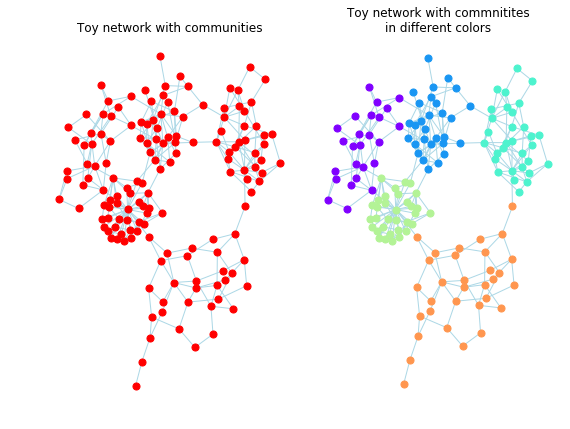

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import LFR_benchmark_graph

##### Custom distinct color function --- to be used later
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


# first, a simple toy example of modular network
n = 150
tau1 = 3.0
tau2 = 2.0
mu = 0.0675
G_list = []
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,
                        min_community=25, seed=10)



# drawing the graph --- Kamada-Kawai layout
# without community assignment
plt.figure(figsize=[8,6])

plt.subplot(121)
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
plt.title('Toy network with communities')
plt.axis('off')

# extracting community assignment indices
commIndSet = {frozenset(G.nodes[v]['community']) for v in G}
commInd = [list(x) for x in iter(commIndSet)]
nComm = len(commInd)

# drawing with community assignment
plt.subplot(122)
node_color_list = get_cmap(nComm+1,'rainbow')
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
for iComm in range(nComm):
    nx.draw_networkx_nodes(G, pos, nodelist=commInd[iComm],
                           node_color = node_color_list(iComm),
                           node_size=50)
plt.title('Toy network with commnitites\nin different colors')
plt.axis('off')

plt.subplots_adjust(hspace=0.15, wspace=0.075, bottom=0.025, top=0.875,
                    left=0.05, right=0.95)
plt.show()

In this particular example, only 6.75% of edges are connecting communities, while the remaining 93.25% of edges are for within-community connections. Since inter-community connections are so sparse, communities are readily identifiable just by looking at the network. However, as the fraction of inter-community connections increases, communities becomes less obvious. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

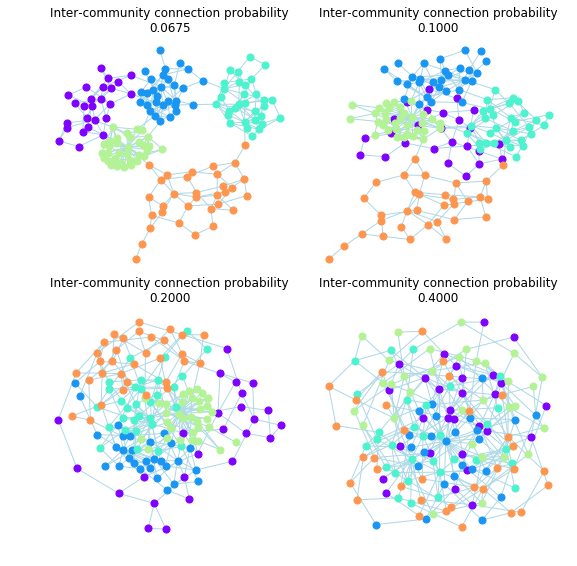

In [5]:
# generating toy networks with different inter-community connection prob
n = 150
tau1 = 3.0
tau2 = 2.0
mu = [0.0675, 0.10, 0.20, 0.40]
G_list = []
for imu in mu:
    G = LFR_benchmark_graph(n, tau1, tau2, imu, average_degree=5,
                            min_community=25, seed=10)
    G_list.append(G)

    
    

# drawing the graph --- Kamada-Kawai layout
plt.figure(figsize=[8,8])
for i,imu in enumerate(mu):
    plt.subplot(2,2,i+1)
    G = G_list[i]
    commIndSet = {frozenset(G.nodes[v]['community']) for v in G}
    commInd = [list(x) for x in iter(commIndSet)]
    nComm = len(commInd)
    node_color_list = get_cmap(nComm+1,'rainbow')

    pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
    for iComm in range(nComm):
        nx.draw_networkx_nodes(G, pos, nodelist=commInd[iComm],
                               node_color = node_color_list(iComm),
                               node_size=50)
    nx.draw_networkx_edges(G, pos, edge_color='lightblue')
    plt.title('Inter-community connection probability\n%6.4f' % imu)
    plt.axis('off')

plt.subplots_adjust(hspace=0.15, wspace=0.075, bottom=0.025, top=0.9,
                    left=0.05, right=0.95)
plt.show()

## Why should we care about network communities?

Because identifying network communities often reveal the underlying partition or grouping of nodes solely based on network connections. Here are two examples of that.

The first example shows the network modules in the karate club network, estimated by two methods (Girvan-Newman method and Louvain method). The Girvan-Newman method is available as the **`girvan_newman`** function in **`networkx.algorithms.community`**. Unfortunately this function returns a series of modular partitions with different numbers of communities (between 1 and n (number of nodes)). Thus I wrote a small function to find the optimal modular partition with the right number of modules (as determined by **modularity**, discussed later). The Louvain method is implemented as the **`best_partition`** function in the **`community`** library (a.k.a., **`python-louvain`**). 

The example network represents a karate club at a university, split into two groups due to an internal dispute. This data set is a well-studied network in social science. 

`<CommunityExamples.py>`

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman, modularity
import community   # Louvain method

##### Custom distinct color function --- to be used later
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


##### girman-newman method, optimized with modularity
def girvan_newman_opt(G, verbose=False):
    runningMaxMod = 0
    commIndSetFull = girvan_newman(G)
    for iNumComm in range(2,len(G)):
        if verbose:
            print('Commnity detection iteration : %d' % iNumComm, end='')
        iPartition = next(commIndSetFull)  # partition with iNumComm communities
        Q = modularity(G, iPartition)  # modularity
        if verbose:
            print('  Modularity : %6.4f' % Q)
        if Q>runningMaxMod:  # saving the optimum partition and associated info
            runningMaxMod = Q
            OptPartition = iPartition
    return OptPartition



##### loading network data
# Karate network
G_karate = nx.read_gml('DataModules/karate.gml', label='id')  
# Football network
G_football = nx.read_gml('DataModules/football.gml')  


##### Community detection 
# Community detection with the girvan-newman algorithm
commInd_karate = girvan_newman_opt(G_karate)
commInd_football = girvan_newman_opt(G_football)
# converting the partitions into dictionaries
partition_karate_GN = {}
for i,iComm in enumerate(commInd_karate):
    for iNode in iComm:
        partition_karate_GN[iNode] = i
partition_football_GN = {}
for i,iComm in enumerate(commInd_football):
    for iNode in iComm:
        partition_football_GN[iNode] = i


# Community detection with the Louvain method
partition_karate_L = community.best_partition(G_karate)
partition_football_L = community.best_partition(G_football)

Let's visualize this network, with modules in different colors.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

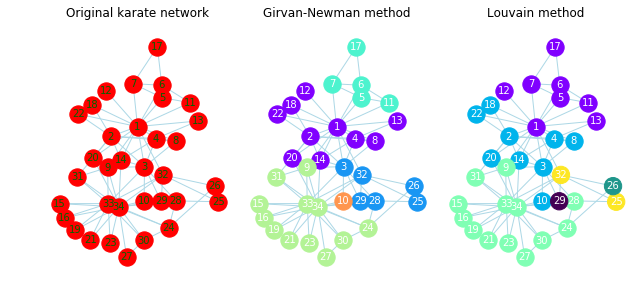

In [9]:
###### drawing the graph (karate network)
plt.figure(figsize=[9,4])

# first, graph without community assignments
plt.subplot(131)
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.title('Original karate network')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

# next, graph with communities in different colors (Girvan-Newman)
plt.subplot(132)
nComm = max([comm for comm in partition_karate_GN.values()])+1
node_color_list = get_cmap(nComm+1,'rainbow')
for iComm in range(nComm):
    nodeList = [iNode for iNode,Comm in partition_karate_GN.items()
                if Comm==iComm]
    nx.draw_networkx_nodes(G_karate, pos, 
                           nodelist=nodeList,
                           node_color = node_color_list(iComm),
                           node_size=300)
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='White')
plt.title('Girvan-Newman method')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

# finally, graph with communities in different colors (Louvain)
plt.subplot(133)
nComm = max([comm for comm in partition_karate_L.values()])+1
node_color_list = get_cmap(nComm+1,'rainbow')
for iComm in range(nComm):
    nodeList = [iNode for iNode,Comm in partition_karate_L.items()
                if Comm==iComm]
    nx.draw_networkx_nodes(G_karate, pos, 
                           nodelist=nodeList,
                           node_color = node_color_list(iComm),
                           node_size=300)
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='White')
plt.title('Louvain method')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

plt.subplots_adjust(hspace=0.15, wspace=0.075, bottom=0.025, top=0.875,
                    left=0.05, right=0.95)
plt.show()

The second example is the college football network. As you can imagine, schools belonging to the same conference tend to play more often among themselves, compared to schools in different conferences. The two estimation methods produced a fairly good result predicting these conferences.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

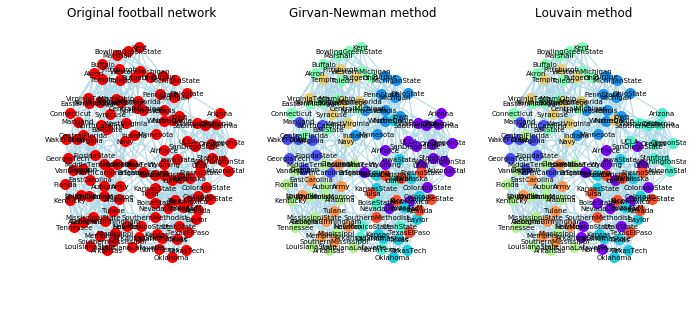

In [10]:
#### drawing the graph (football network)
plt.figure(figsize=[10,4.5])
plt.subplot(131)

# first, graph without community assignments
pos = nx.kamada_kawai_layout(G_football, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_football, pos, node_size=100)
nx.draw_networkx_edges(G_football, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_football, pos, font_size=7, font_color='Black')
plt.title('Original football network')
plt.axis('off')
plt.xlim([-1.15, 1.15])
plt.ylim([-1.15, 1.15])

# next, graph with communities in different colors (Girvan-Newman)
plt.subplot(132)
nComm = max([comm for comm in partition_football_GN.values()])+1
node_color_list = get_cmap(nComm+1,'rainbow')
for iComm in range(nComm):
    nodeList = [iNode for iNode,Comm in partition_football_GN.items()
                if Comm==iComm]
    nx.draw_networkx_nodes(G_football, pos, 
                           nodelist=nodeList,
                           node_color = node_color_list(iComm),
                           node_size=100)
nx.draw_networkx_edges(G_football, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_football, pos, font_size=7, font_color='black')
plt.title('Girvan-Newman method')
plt.axis('off')
plt.xlim([-1.15, 1.15])
plt.ylim([-1.15, 1.15])

# next, graph with communities in different colors (Louvain)
plt.subplot(133)
nComm = max([comm for comm in partition_football_L.values()])+1
node_color_list = get_cmap(nComm+1,'rainbow')
for iComm in range(nComm):
    nodeList = [iNode for iNode,Comm in partition_football_L.items()
                if Comm==iComm]
    nx.draw_networkx_nodes(G_football, pos, 
                           nodelist=nodeList,
                           node_color = node_color_list(iComm),
                           node_size=100)
nx.draw_networkx_edges(G_football, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_football, pos, font_size=7, font_color='black')
plt.title('Louvain method')
plt.axis('off')
plt.xlim([-1.15, 1.15])
plt.ylim([-1.15, 1.15])


plt.subplots_adjust(hspace=0.15, wspace=0.075, bottom=0.025, top=0.875,
                    left=0.05, right=0.95)
plt.show()

# 3. Modularity
<hr style="height:1px;border:none" />

## How clustered is a network?

As I mentioned earlier, some networks consists of highly interconnected communities, while others are not. If you have community partition information, you can examine how modular a network is, using a metric called **modularity**. In a nutshell, modularity examines the fraction of within community edges and compared that to the expected fraction if connections were at random. Modularity ranges from -0.5 to 1.0. A negative modularity measure means communities are likely random, whereas a high positive modularity means the network is highly modular (i.e., communities likely exist).

The **`modularity`** function in **`networkx.algorithms.community`** calculates modularity based on the community partition information (true partition or estimated partition). There is another **`modularity`** function under **`community`** as well, which takes the partition information organized as a dictionary. 

The modularity can be calculated based on the estimated partition of a network. Community detection algorithms yielding higher modularity is often desired. Here are modularities of the karate and football networks, by the Girvan-Newman method and the Louvain method.

In [12]:
###### Modularity
print('Modularity -- karate network')
print('Girvan-Newman: %6.4f' % community.modularity(partition_karate_GN,
                                                    G_karate))
print('Louvain: %6.4f' % community.modularity(partition_karate_L,
                                              G_karate))
print()

print('Modularity -- football network')
print('Girvan-Newman: %6.4f' % community.modularity(partition_football_GN,
                                                    G_football))
print('Louvain: %6.4f' % community.modularity(partition_football_L,
                                              G_football))
print()

Modularity -- karate network
Girvan-Newman: 0.4013
Louvain: 0.4198

Modularity -- football network
Girvan-Newman: 0.5996
Louvain: 0.6021



# 4. Modular organization: brain network (ROI)
<hr style="height:1px;border:none" />

